**Step 1:importing the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures# For polynomial transformation

**Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)**

In [5]:
np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise


**# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)**

In [14]:
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

**# Step 4: Create and train the Polynomial Regression model**

In [9]:

model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

**Step 5:Get the values of slope(m) and intercept(c) from trained model**

In [11]:
#coefficient and intercept
m=model.coef_[0]
print("Slope:",m)
c=model.intercept_
print("Intercept:",c)

Slope: 0.0
Intercept: 25.834848216909297


**Step 6:Display the equation of the line**

In [23]:
#equation of a straight line
print(f'Equation of a line:Y={m:.2f}X + {c:.2f}')

Equation of a line:Y=0.00X + 25.83


**Step 7:Predict values using the model**

In [34]:
Y_pred=model.predict(X_poly)#Predict salaries for given experience values

## Model_Evaluation_metrics

**1.Mean Squared Error(MSE)-Measures average squared difference between actual and predicted values** 

In [38]:
#It's commonly used when we want to penalize large errors more heavily.
mse=mean_squared_error(Y,Y_pred)
print(f'Mean Squared Error(MSE):{mse:.2f}')

Mean Squared Error(MSE):11.47


**2.Mean Absolute Error(MAE)-Measures average absolute differences between actual and predicted values**

In [41]:
mae=mean_absolute_error(Y,Y_pred)
print(f'Mean Absolute Error(MSE):{mae:.2f}')

Mean Absolute Error(MSE):2.98


**3.Root Mean Squared Error(RMSE)-Measures the standard deviation of residuals(errors)**

In [44]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error(RMSE):{rmse:.2f}')

Root Mean Squared Error(RMSE):3.39


**4.R-Square(R²)-Represents how well the model fits the data(0 to 1,where 1 is best)**

In [47]:
#It used for measuring accuracies it doesnot look for dependancies(predictores) it just finds the precision
r2=r2_score(Y,Y_pred)
print(f'R-Squared(R²):{r2:.2f}')

R-Squared(R²):0.95


**5.adjusted R-Squared(R²_adj)-adjusted for the number of predictors,better for multiple regression**

In [50]:
n=len(Y)#Number of observations
p=1#number of independent variables(Experience)
adj_r2=1 - ((1 - r2) * (n-1)/(n-p-1))
print(f'Adjusted R-squared:{adj_r2:.2f}')

Adjusted R-squared:0.94


**6.OLS(Ordinary Least Squares)**

In [59]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:32:21   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\Proxy1\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


**Step 8:Plot the actual data points**

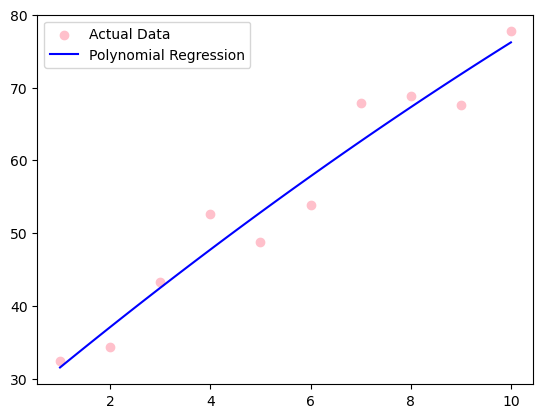

In [70]:
plt.scatter(X, Y, color='pink', label='Actual Data')

# Plot the polynomial regression curve
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # Generate range of values
X_range_poly = poly.transform(X_range)  # Transform the range to polynomial features
y_range = model.predict(X_range_poly)  # Predict the polynomial values

# Plot the polynomial regression curve
plt.plot(X_range, y_range, color='blue', label='Polynomial Regression')
plt.legend()
plt.show()